## Loading Data

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('weather.csv')
df['encoded_city'] = pd.factorize(df['city'])[0]
df

,city,lat,lon,month,monthnum,sunshine,rain,encoded_city
0,San Diego,32.715736,-117.161087,Jan,1,217,1.53,0
1,San Diego,32.715736,-117.161087,Feb,2,255,0.15,0
2,San Diego,32.715736,-117.161087,Mar,3,234,0.57,0
3,San Diego,32.715736,-117.161087,Apr,4,236,1.01,0
4,San Diego,32.715736,-117.161087,May,5,277,0.02,0
...,...,...,...,...,...,...,...,...
67,Miami,25.761681,-80.191788,Aug,8,263,8.88,5
68,Miami,25.761681,-80.191788,Sep,9,216,9.86,5
69,Miami,25.761681,-80.191788,Oct,10,215,6.33,5
70,Miami,25.761681,-80.191788,Nov,11,212,3.27,5


## Plot #1: Month vs Sunshine Across Cities

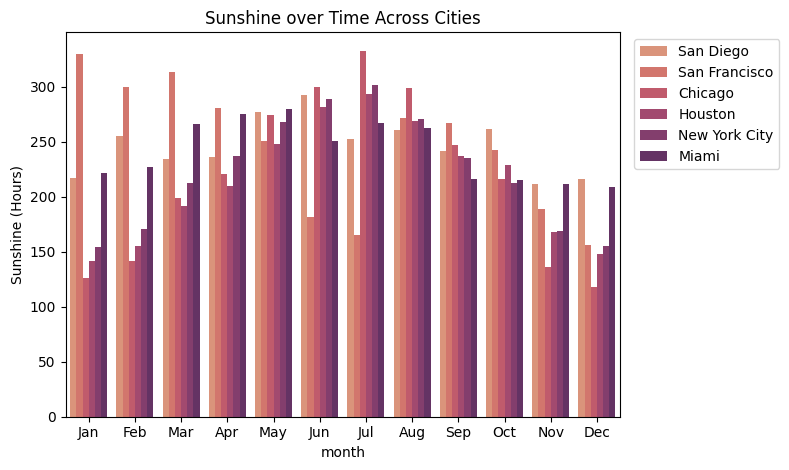

In [118]:
sns.barplot(data=df, x='month', y='sunshine', hue='city', palette='flare')
plt.title('Sunshine over Time Across Cities')
plt.ylabel('Sunshine (Hours)') 
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')

## Plot 2: Month vs Rain Across Cities

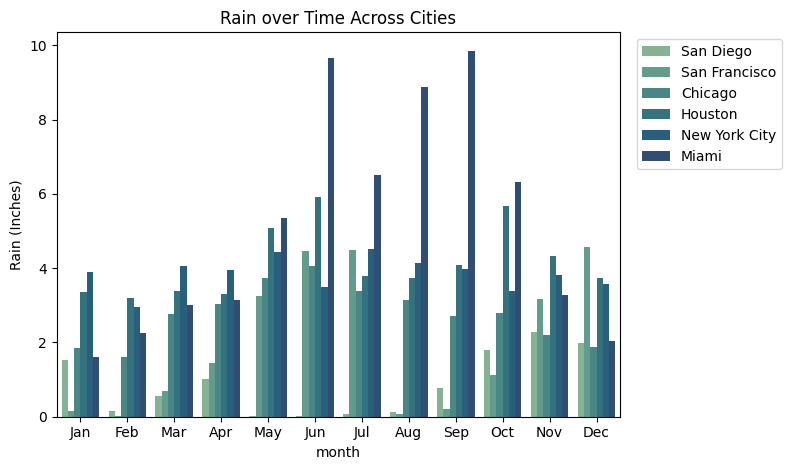

In [119]:
sns.barplot(data=df, x='month', y='rain', hue='city', palette='crest')
plt.title('Rain over Time Across Cities')
plt.ylabel('Rain (Inches)')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')

## Plot 3: Sunshine vs Rain Across Cities

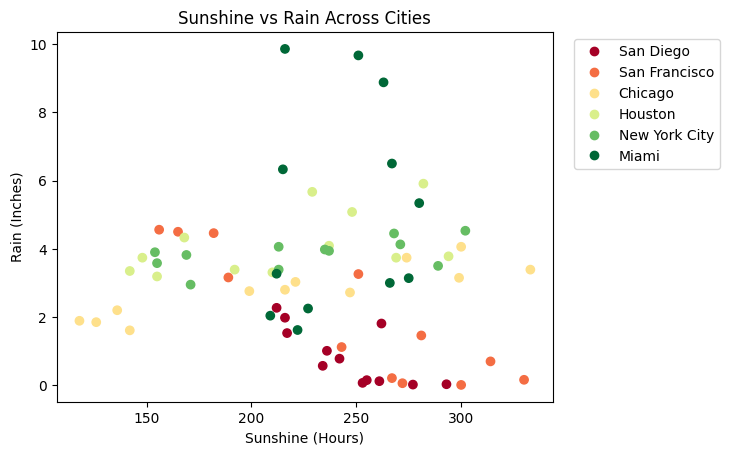

In [120]:
p3 = plt.scatter(df['sunshine'], df['rain'], c = df['encoded_city'], cmap = 'RdYlGn')
plt.legend(handles=p3.legend_elements()[0], labels=['San Diego', 'San Francisco', 'Chicago', 'Houston', 'New York City', 'Miami'], bbox_to_anchor=(1.35, 1), loc='upper right')
plt.title('Sunshine vs Rain Across Cities') 
plt.xlabel('Sunshine (Hours)') 
plt.ylabel('Rain (Inches)')
plt.show()

In [121]:
df.groupby('lat').mean(numeric_only=True)

,lon,monthnum,sunshine,rain,encoded_city
lat,,,,,
25.761681,-80.191788,6.5,241.916667,5.158333,5.0
29.760427,-95.369804,6.5,214.500000,4.131667,3.0
32.715736,-117.161087,6.5,246.500000,0.861667,0.0
37.774929,-122.419418,6.5,245.833333,1.971667,1.0
40.712776,-74.005974,6.5,223.083333,3.852500,4.0
41.878113,-87.629799,6.5,217.583333,2.766667,2.0


## Plot Preference

Out of these plots, I prefer Plot #3: Sunshine vs Rain Across Cities the most. This is because it displays both sunshine and rain levels in a visually digestible way while across cleanly separating data points based off the city. However, one improvement I would like to make to the visualization is replacing the current color legend with colors that accurately represent each city's climate and temperament. For actual analysis, I want to try searching for external data on the citizens' temperament in each month/city and incorporate that into the previous visualization. But, with my current rough plot, I can already notice clear differences across cities for their weather.

## Final Plot: Month vs Rain Across Cities in Summer

In [122]:
summer = df[df['monthnum'] > 5]
summer = summer[summer['monthnum'] < 10]
summer

,city,lat,lon,month,monthnum,sunshine,rain,encoded_city
5,San Diego,32.715736,-117.161087,Jun,6,293,0.03,0
6,San Diego,32.715736,-117.161087,Jul,7,253,0.07,0
7,San Diego,32.715736,-117.161087,Aug,8,261,0.12,0
8,San Diego,32.715736,-117.161087,Sep,9,242,0.78,0
17,San Francisco,37.774929,-122.419418,Jun,6,182,4.46,1
18,San Francisco,37.774929,-122.419418,Jul,7,165,4.50,1
19,San Francisco,37.774929,-122.419418,Aug,8,272,0.06,1
20,San Francisco,37.774929,-122.419418,Sep,9,267,0.21,1
29,Chicago,41.878113,-87.629799,Jun,6,300,4.06,2
30,Chicago,41.878113,-87.629799,Jul,7,333,3.39,2


In [123]:
summer['city'] = pd.Categorical(summer['city'], categories=["San Diego", "San Francisco", "Chicago", "New York City", "Houston", "Miami"], ordered=True)
summer = summer.sort_values('city')
summer

,city,lat,lon,month,monthnum,sunshine,rain,encoded_city
5,San Diego,32.715736,-117.161087,Jun,6,293,0.03,0
6,San Diego,32.715736,-117.161087,Jul,7,253,0.07,0
7,San Diego,32.715736,-117.161087,Aug,8,261,0.12,0
8,San Diego,32.715736,-117.161087,Sep,9,242,0.78,0
17,San Francisco,37.774929,-122.419418,Jun,6,182,4.46,1
18,San Francisco,37.774929,-122.419418,Jul,7,165,4.50,1
19,San Francisco,37.774929,-122.419418,Aug,8,272,0.06,1
20,San Francisco,37.774929,-122.419418,Sep,9,267,0.21,1
31,Chicago,41.878113,-87.629799,Aug,8,299,3.15,2
32,Chicago,41.878113,-87.629799,Sep,9,247,2.72,2


In [124]:
max = df[df['city'] != 'Miami']
min = max.copy()
max = max.loc[max.groupby('month')['rain'].idxmax()]
min = min.loc[min.groupby('month')['rain'].idxmin()]
max['city'] = 'Maximum Rain of Other Cities'
min['city'] = 'Minimum Rain of Other Cities'
miami = df[df['city'] == 'Miami']
final = pd.concat([max, min, miami])
final = final.sort_values('monthnum')
final

,city,lat,lon,month,monthnum,sunshine,rain,encoded_city
12,Minimum Rain of Other Cities,37.774929,-122.419418,Jan,1,330,0.16,1
48,Maximum Rain of Other Cities,40.712776,-74.005974,Jan,1,154,3.90,4
60,Miami,25.761681,-80.191788,Jan,1,222,1.62,5
13,Minimum Rain of Other Cities,37.774929,-122.419418,Feb,2,300,0.01,1
37,Maximum Rain of Other Cities,29.760427,-95.369804,Feb,2,155,3.19,3
61,Miami,25.761681,-80.191788,Feb,2,227,2.25,5
50,Maximum Rain of Other Cities,40.712776,-74.005974,Mar,3,213,4.06,4
2,Minimum Rain of Other Cities,32.715736,-117.161087,Mar,3,234,0.57,0
62,Miami,25.761681,-80.191788,Mar,3,266,3.00,5
51,Maximum Rain of Other Cities,40.712776,-74.005974,Apr,4,237,3.94,4


In [125]:
import textwrap

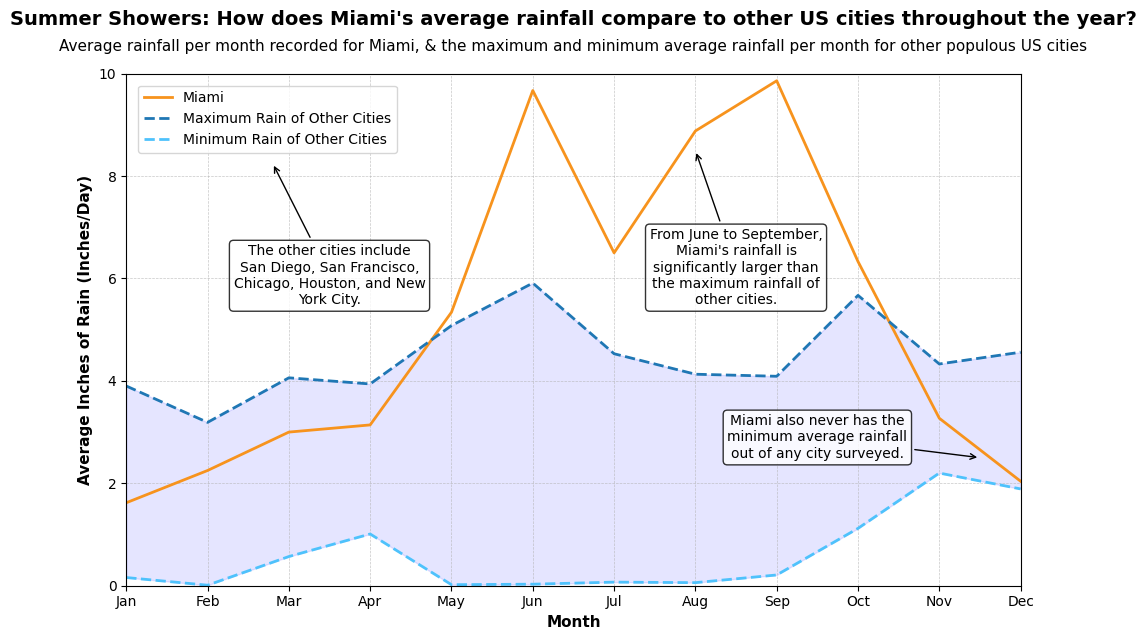

In [144]:
# sns.barplot(data=summer, x='month', y='rain', hue='city', palette='Blues_d')
# plt.title('Rain over Time Across Cities')
# plt.xlabel('Month') 
# plt.ylabel('Rain (Inches)')
# plt.tight_layout()
# plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')


plt.figure(figsize=(11, 6.5))


sns.lineplot(data=final[final['city'] == 'Miami'], x='month', y='rain', label='Miami', color='#f7931d', linewidth=2)
sns.lineplot(data=final[final['city'] == 'Maximum Rain of Other Cities'], x='month', y='rain', label='Maximum Rain of Other Cities', color='#1f77b4', linestyle='--', linewidth=2)
sns.lineplot(data=final[final['city'] == 'Minimum Rain of Other Cities'], x='month', y='rain', label='Minimum Rain of Other Cities', color='#4ec2fc', linestyle='--', linewidth=2)

max_values = final[final['city'] == 'Maximum Rain of Other Cities']['rain'].values
min_values = final[final['city'] == 'Minimum Rain of Other Cities']['rain'].values
months = final[final['city'] == 'Maximum Rain of Other Cities']['month'].values
plt.fill_between(months, min_values, max_values, color='blue', alpha=0.1, label=None) 

plt.title('Summer Showers: How does Miami\'s average rainfall compare to other US cities throughout the year?', fontsize=14, fontweight='bold', pad = 35)
plt.text(
    5.5, 10.45,  # Adjust position as needed
    'Average rainfall per month recorded for Miami, & the maximum and minimum average rainfall per month for other populous US cities',
    fontsize=11,
    ha='center'
)
plt.xlabel('Month', fontsize=11, fontweight='bold')
plt.ylabel('Average Inches of Rain (Inches/Day)', fontsize=11, fontweight='bold')
plt.xlim('Jan', 'Dec')
plt.ylim(0, 10)

def wrap_text(text, width):
    return "\n".join(textwrap.wrap(text, width))

plt.annotate(
    wrap_text("From June to September, Miami's rainfall is significantly larger than the maximum rainfall of other cities.", width = 25),
    xy=(7, 8.5), xycoords='data',
    xytext=(7.5, 5.5), textcoords='data',
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1),
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8),
    fontsize=10, color='black', ha='center'
)

plt.annotate(
    wrap_text("The other cities include San Diego, San Francisco, Chicago, Houston, and New York City.", width = 25),
    xy=(1.8, 8.25), xycoords='data',
    xytext=(2.5, 5.5), textcoords='data',
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1),
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8),
    fontsize=10, color='black', ha='center'
)

plt.annotate(
    wrap_text("Miami also never has the minimum average rainfall out of any city surveyed.", width = 25),
    xy=(10.5, 2.5), xycoords='data',
    xytext=(8.5, 2.5), textcoords='data',
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1),
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8),
    fontsize=10, color='black', ha='center'
)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
# Adjust legend and layout
plt.legend(bbox_to_anchor=(0.31, 0.99), loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()